# Tunning Parameters of XGBoost
Reference: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/diabetes.csv/1

In [8]:
import pandas as pd
import xgboost as xgb
import sklearn
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline


import seaborn as sns
sns.set()


In [5]:
dataset_df = pd.read_csv('./datasets/step_0/diabetes.csv')

In [3]:
dataset_df.shape

(768, 9)

In [4]:
dataset_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


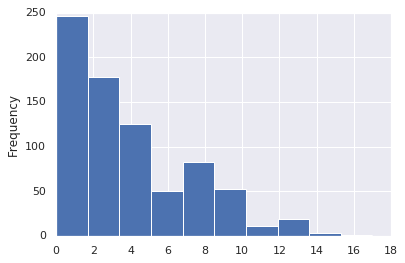

In [9]:
dataset_df['Pregnancies'].plot.hist()

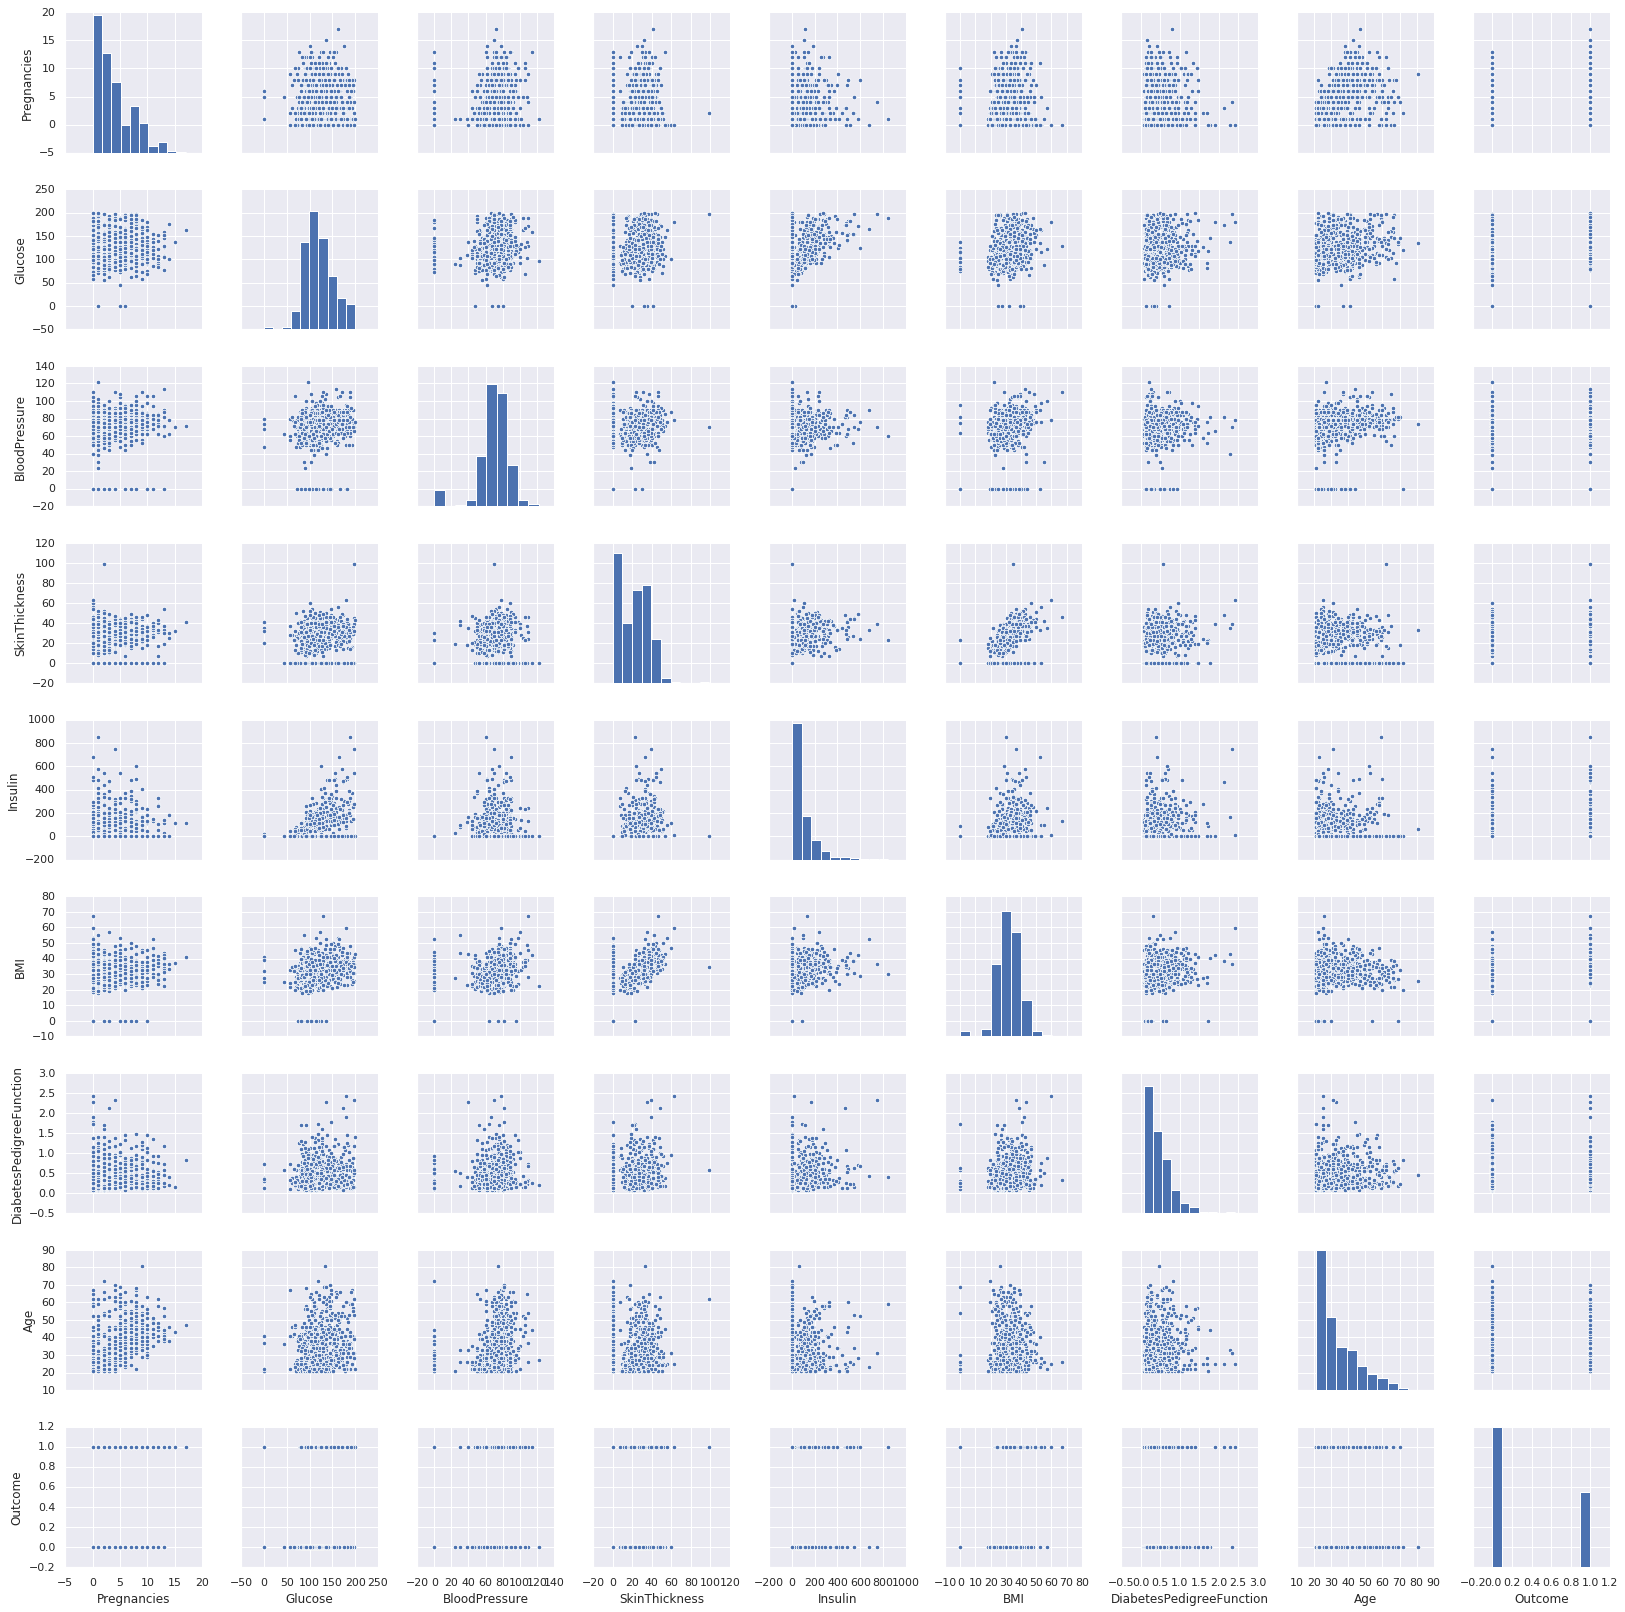

In [10]:
sns.pairplot(dataset_df)

# Check the distribution if Outcome is 1

In [11]:
index = dataset_df.iloc[:, -1] == 1

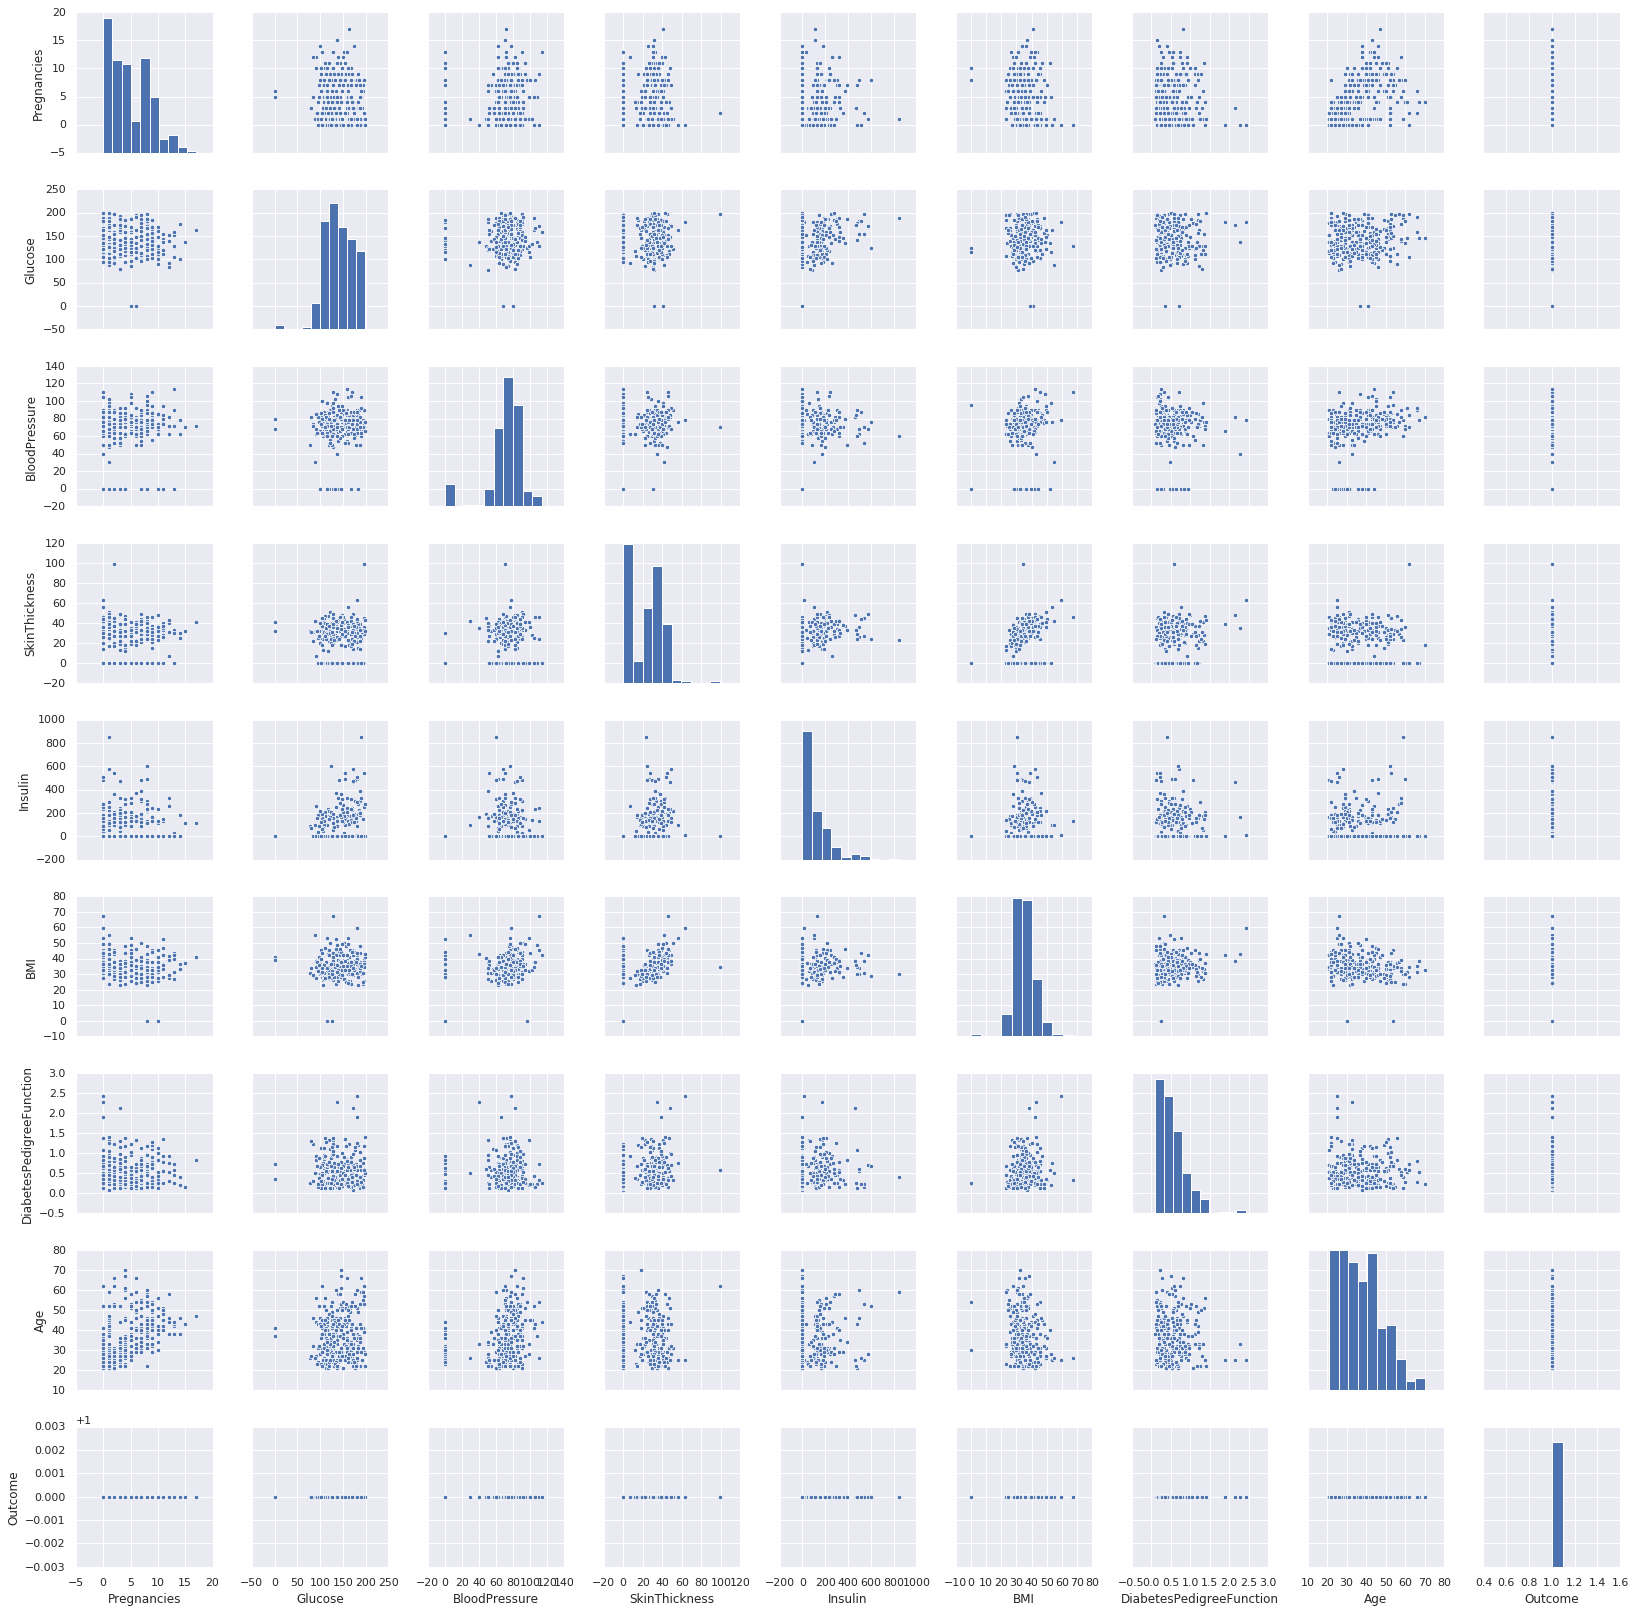

In [12]:
sns.pairplot(dataset_df[index])

# Check the distribution if Outcome is 0

In [13]:
index = dataset_df.iloc[:, -1] == 0

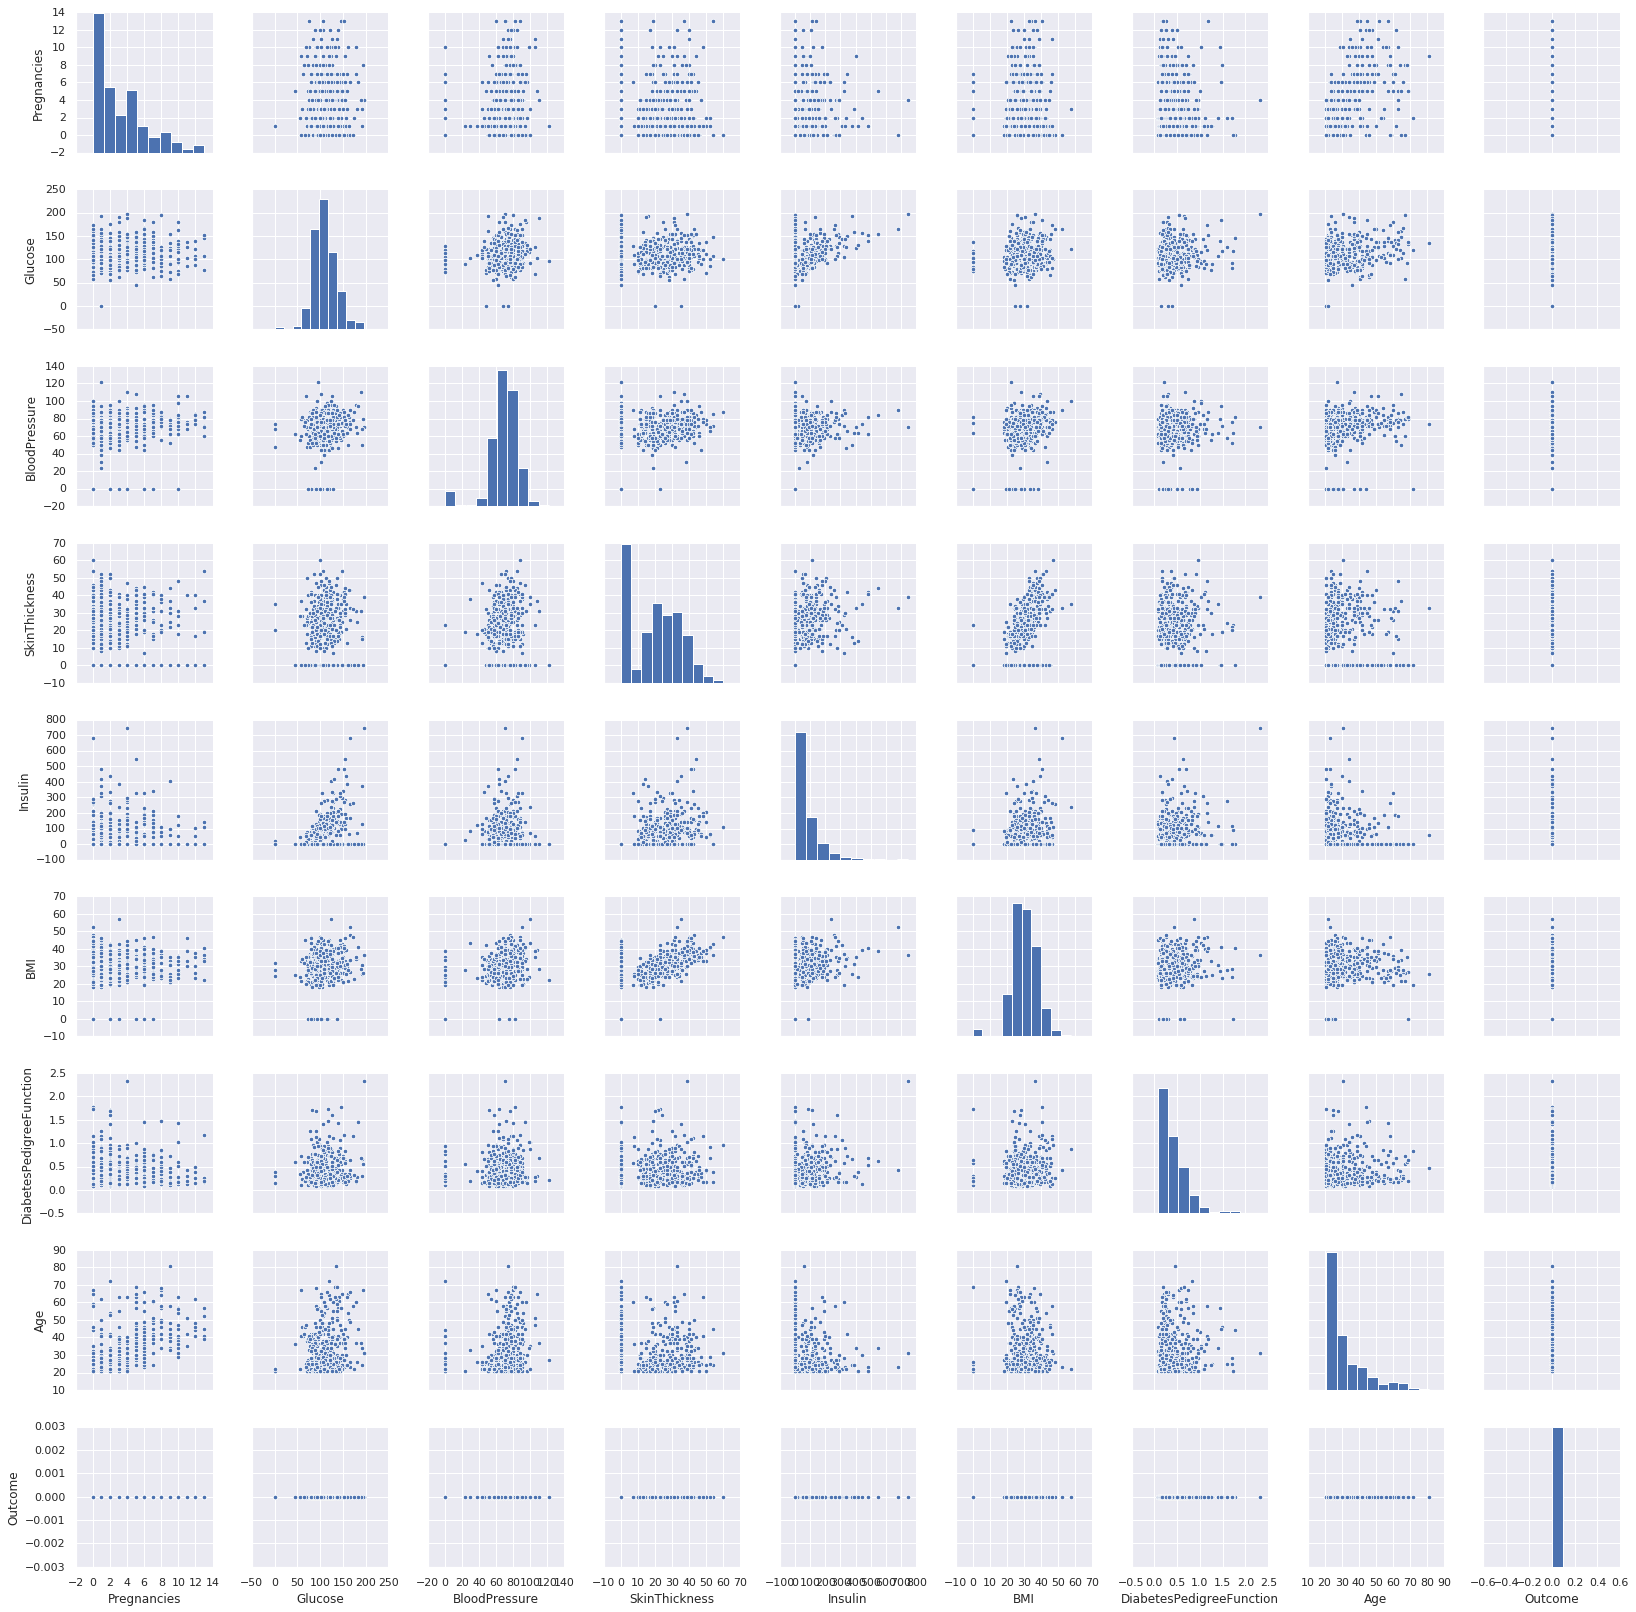

In [14]:
sns.pairplot(dataset_df[index])

# Split Train/Test Datasets

In [6]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset_df.iloc[:, :-1],
                                                                           dataset_df.iloc[:, -1],
                                                                           random_state=7)

In [6]:
X_train.shape

(576, 8)

In [7]:
y_train.shape

(576,)

# Step 1: Fix learning rate and number of estimator for tuning tree-based paramters

### Use default settings

In [18]:
model_default = xgb.XGBClassifier()

%time model_default.fit(X_train, y_train)

pred = model_default.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, pred)

print()
print('Accuracy: {}'.format(accuracy))
print()
print(sklearn.metrics.classification_report(y_test, pred))

CPU times: user 38.6 ms, sys: 40 µs, total: 38.6 ms
Wall time: 38.5 ms

Accuracy: 0.78125

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       122
           1       0.73      0.63      0.68        70

   micro avg       0.78      0.78      0.78       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.78      0.78       192



In [19]:
model_default.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)>

#### Use recommanded initial parameters
Reference: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/


- max_depth = 5 (3 in XGBModel default
- min_child_weight = 1 (default in XGBModel)
- gamma = 0 (default in XGBModel)
- subsample = 0.8 (1.0 in XGBModel default)
- colsample_bytree = 0.8  (1.0 in XGBModel default)
- scale_pos_weight = 1 (default in XGBModel)

In [40]:
param_grid_1 = {'learning_rate': np.arange(0.05, 0.3, 0.05),
              'n_estimator': np.arange(100, 1200, 200)}

param_grid_1

{'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25]),
 'n_estimator': array([ 100,  300,  500,  700,  900, 1100])}

In [41]:
max_depth = 5
min_child_weight = 1
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
scale_pos_weight = 1
nthread=4
SEED=27

model_1 = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimator=1000,
                           max_depth=max_depth,
                           min_child_weight=min_child_weight,
                           gamma=gamma,
                           subsample=subsample,
                           colsample_bytree=colsample_bytree,
                           scale_pos_weight=scale_pos_weight,
                           objective='binary:logistic',
                           nthread=nthread,
                           seed=SEED)


gsearch_1 = sklearn.model_selection.GridSearchCV(estimator=model_1,
                                                param_grid=param_grid_1,
                                                scoring='roc_auc',
                                                n_jobs=4,
                                                iid=False,
                                                cv=5)

# model_1.fit(X_train, y_train)
# pred = model_1.pred1ict(X_test)

%time model_1_trained = gsearch_1.fit(X_train, y_train)
pred = model_1_trained.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, pred)

print()
print('Accuracy: {}'.format(accuracy))
print()

print(sklearn.metrics.classification_report(y_test, pred))

print()
print(gsearch_1.best_params_)

CPU times: user 669 ms, sys: 122 ms, total: 791 ms
Wall time: 21.8 s

Accuracy: 0.78125

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       122
           1       0.72      0.66      0.69        70

   micro avg       0.78      0.78      0.78       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.78      0.78       192


{'learning_rate': 0.05, 'n_estimator': 100}


#### Since the learning rate hit the lower bound of recommendation, I stop the furthur fine tuning.

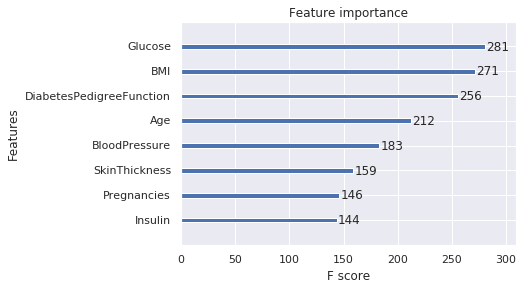

In [42]:
xgb.plot_importance(gsearch_1.best_estimator_)

# Step 2: Tune max_depth and min_child_weight

In [44]:
param_grid_2 = {'max_depth': np.arange(3, 10, 2),
               'min_child_weight': np.arange(1, 6, 2)}

param_grid_2

{'max_depth': array([3, 5, 7, 9]), 'min_child_weight': array([1, 3, 5])}

In [45]:
# TBD Parameters
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
scale_pos_weight = 1

# Learned Parameters
learning_rate = 0.05
n_estimator = 100

In [48]:
model_2 = xgb.XGBClassifier(learning_rate=learning_rate,
                           n_estimator=n_estimator,
                           max_depth=max_depth,
                           min_child_weight=min_child_weight,
                           gamma=gamma,
                           subsample=subsample,
                           colsample_bytree=colsample_bytree,
                           scale_pos_weight=scale_pos_weight,
                           objective='binary:logistic',
                           nthread=nthread,
                           seed=SEED)

gsearch_2 = sklearn.model_selection.GridSearchCV(estimator=model_2,
                                                param_grid=param_grid_2,
                                                scoring='roc_auc',
                                                n_jobs=4,
                                                iid=False,
                                                cv=5)

%time model_2_trained = gsearch_2.fit(X_train, y_train)

pred = model_2_trained.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, pred)

print()
print('Accuracy: {}'.format(accuracy))
print()

print(sklearn.metrics.classification_report(y_test, pred))

print()
print(gsearch_2.best_params_)

CPU times: user 304 ms, sys: 89.8 ms, total: 394 ms
Wall time: 10.2 s

Accuracy: 0.8020833333333334

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       122
           1       0.77      0.66      0.71        70

   micro avg       0.80      0.80      0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192


{'max_depth': 3, 'min_child_weight': 3}


#### Fine tune min_child_weight
Since the max_depth=3 is the default value of XGBModel, I stop fine tuning this parameter.

In [55]:
param_grid_2_2 = {'min_child_weight': np.arange(2, 5, 1)}
param_grid = param_grid_2_2
param_grid_2_2

{'min_child_weight': array([2, 3, 4])}

In [56]:
# TBD Parameters
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
scale_pos_weight = 1

# Learned Parameters
learning_rate = 0.05
n_estimator = 100
max_depth = 3

In [57]:
model_2 = xgb.XGBClassifier(learning_rate=learning_rate,
                           n_estimator=n_estimator,
                           max_depth=max_depth,
                           min_child_weight=min_child_weight,
                           gamma=gamma,
                           subsample=subsample,
                           colsample_bytree=colsample_bytree,
                           scale_pos_weight=scale_pos_weight,
                           objective='binary:logistic',
                           nthread=nthread,
                           seed=SEED)

gsearch_2 = sklearn.model_selection.GridSearchCV(estimator=model_2,
                                                param_grid=param_grid,
                                                scoring='roc_auc',
                                                n_jobs=4,
                                                iid=False,
                                                cv=5)

%time model_2_trained = gsearch_2.fit(X_train, y_train)

pred = model_2_trained.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, pred)

print()
print('Accuracy: {}'.format(accuracy))
print()

print(sklearn.metrics.classification_report(y_test, pred))

print()
print(gsearch_2.best_params_)

CPU times: user 151 ms, sys: 39.2 ms, total: 190 ms
Wall time: 1.63 s

Accuracy: 0.8020833333333334

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       122
           1       0.77      0.66      0.71        70

   micro avg       0.80      0.80      0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192


{'min_child_weight': 3}


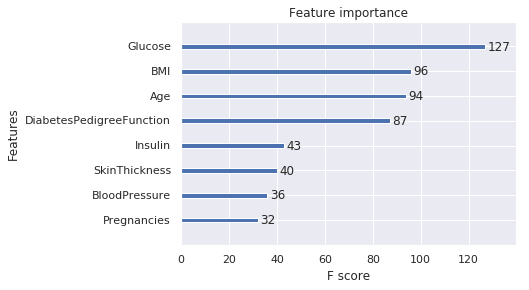

In [61]:
xgb.plot_importance(gsearch_2.best_estimator_)

# Step 3: Tune gamma

In [60]:
param_grid_3 = {'gamma': np.arange(0.0, 0.5, 0.1)}
param_grid = param_grid_3
param_grid_3

{'gamma': array([0. , 0.1, 0.2, 0.3, 0.4])}

In [59]:
# TBD Parameters
subsample = 0.8
colsample_bytree = 0.8
scale_pos_weight = 1

# Learned Parameters
learning_rate = 0.05
n_estimator = 100
max_depth = 3
min_child_weight = 3


In [62]:
model_3 = xgb.XGBClassifier(learning_rate=learning_rate,
                           n_estimator=n_estimator,
                           max_depth=max_depth,
                           min_child_weight=min_child_weight,
                           gamma=gamma,
                           subsample=subsample,
                           colsample_bytree=colsample_bytree,
                           scale_pos_weight=scale_pos_weight,
                           objective='binary:logistic',
                           nthread=nthread,
                           seed=SEED)

gsearch_3 = sklearn.model_selection.GridSearchCV(estimator=model_3,
                                                param_grid=param_grid,
                                                scoring='roc_auc',
                                                n_jobs=4,
                                                iid=False,
                                                cv=5)

%time model_3_trained = gsearch_3.fit(X_train, y_train)

pred = model_3_trained.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, pred)

print()
print('Accuracy: {}'.format(accuracy))
print()

print(sklearn.metrics.classification_report(y_test, pred))

print()
print(gsearch_3.best_params_)

CPU times: user 165 ms, sys: 52.9 ms, total: 218 ms
Wall time: 2.64 s

Accuracy: 0.8020833333333334

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       122
           1       0.77      0.66      0.71        70

   micro avg       0.80      0.80      0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192


{'gamma': 0.0}


# Step 4: Tune subsample and colsample_bytree

In [69]:
param_grid_4 = {'subsample': np.arange(0.6, 1.05, 0.1),
               'colsample_bytree': np.arange(0.6, 1.05, 0.1)}

param_grid = param_grid_4
param_grid

{'subsample': array([0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.6, 0.7, 0.8, 0.9, 1. ])}

In [70]:
# TBD Parameters
subsample = 0.8
colsample_bytree = 0.8
scale_pos_weight = 1

# Learned Parameters
learning_rate = 0.05
n_estimator = 100
max_depth = 3
min_child_weight = 3
gamma = 0.0

In [71]:
model_4 = xgb.XGBClassifier(learning_rate=learning_rate,
                           n_estimator=n_estimator,
                           max_depth=max_depth,
                           min_child_weight=min_child_weight,
                           gamma=gamma,
                           subsample=subsample,
                           colsample_bytree=colsample_bytree,
                           scale_pos_weight=scale_pos_weight,
                           objective='binary:logistic',
                           nthread=nthread,
                           seed=SEED)

gsearch_4 = sklearn.model_selection.GridSearchCV(estimator=model_4,
                                                param_grid=param_grid,
                                                scoring='roc_auc',
                                                n_jobs=4,
                                                iid=False,
                                                cv=5)

%time model_4_trained = gsearch_4.fit(X_train, y_train)

pred = model_4_trained.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, pred)

print()
print('Accuracy: {}'.format(accuracy))
print()

print(sklearn.metrics.classification_report(y_test, pred))

print()
print(gsearch_4.best_params_)

CPU times: user 502 ms, sys: 68.8 ms, total: 570 ms
Wall time: 11.7 s

Accuracy: 0.8020833333333334

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       122
           1       0.77      0.66      0.71        70

   micro avg       0.80      0.80      0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192


{'colsample_bytree': 0.7999999999999999, 'subsample': 0.7999999999999999}


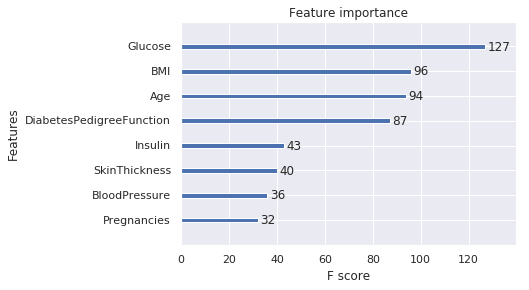

In [72]:
xgb.plot_importance(gsearch_4.best_estimator_)

# Step 5: Tuning Regularization Parameters

In [73]:
param_grid_5 = {'reg_alpha': [1e-5, 1e-2, 0.0, 0.1, 1.0, 100.0]}
param_grid = param_grid_5
param_grid

{'reg_alpha': [1e-05, 0.01, 0.0, 0.1, 1.0, 100.0]}

In [74]:
# TBD Parameters
scale_pos_weight = 1

# Learned Parameters
learning_rate = 0.05
n_estimator = 100
max_depth = 3
min_child_weight = 3
gamma = 0.0
subsample = 0.8
colsample_bytree = 0.8

In [75]:
model_5 = xgb.XGBClassifier(learning_rate=learning_rate,
                           n_estimator=n_estimator,
                           max_depth=max_depth,
                           min_child_weight=min_child_weight,
                           gamma=gamma,
                           subsample=subsample,
                           colsample_bytree=colsample_bytree,
                           scale_pos_weight=scale_pos_weight,
                           objective='binary:logistic',
                           nthread=nthread,
                           seed=SEED)

gsearch_5 = sklearn.model_selection.GridSearchCV(estimator=model_5,
                                                param_grid=param_grid,
                                                scoring='roc_auc',
                                                n_jobs=4,
                                                iid=False,
                                                cv=5)

%time model_5_trained = gsearch_5.fit(X_train, y_train)

pred = model_5_trained.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, pred)

print()
print('Accuracy: {}'.format(accuracy))
print()

print(sklearn.metrics.classification_report(y_test, pred))

print()
print(gsearch_5.best_params_)

CPU times: user 198 ms, sys: 81.6 ms, total: 280 ms
Wall time: 5.34 s

Accuracy: 0.8020833333333334

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       122
           1       0.77      0.66      0.71        70

   micro avg       0.80      0.80      0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192


{'reg_alpha': 1e-05}


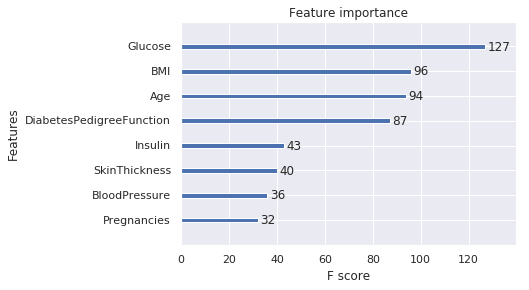

In [76]:
xgb.plot_importance(gsearch_5.best_estimator_)